# Load Data

In [19]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# baca file csv
data = pd.read_csv("churn_dataset_bmlp_3.csv")


Kode tersebut membaca file CSV bernama churn_dataset_bmlp_3.csv dan menyimpannya ke dalam variabel data dalam bentuk DataFrame, sehingga data dapat diolah dan dianalisis menggunakan pustaka Pandas

In [21]:
# Menampilkan 5 baris pertama data
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Kode tersebut digunakan untuk menampilkan 5 baris pertama dari DataFrame data yang sebelumnya telah dimuat, sehingga Anda dapat melihat struktur dan isi awal data secara sekilas.

In [22]:
# Tampilan informasi umum tentang dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Penjelasan Fitur Dataset

1. **RowNumber**  
   Nomor baris dalam dataset yang digunakan untuk identifikasi unik setiap entri. Fitur ini tidak memiliki makna analitis.  

2. **CustomerId**  
   ID unik yang mengidentifikasi setiap pelanggan dalam sistem. Berguna untuk referensi dan penggabungan data.  

3. **Surname**  
   Nama belakang pelanggan. Fitur ini tidak relevan untuk analisis model dan biasanya tidak digunakan.  

4. **CreditScore**  
   Skor kredit yang menunjukkan kelayakan kredit pelanggan. Fitur ini dapat memengaruhi keputusan pelanggan untuk tetap atau berhenti menggunakan layanan.  

5. **Geography**  
   Lokasi geografis tempat tinggal pelanggan. Informasi ini dapat memengaruhi perilaku dan kebutuhan layanan pelanggan.  

6. **Gender**  
   Jenis kelamin pelanggan. Meskipun tidak selalu memengaruhi churn secara langsung, fitur ini berguna untuk analisis demografis.  

7. **Age**  
   Usia pelanggan. Usia dapat memengaruhi kebiasaan dan preferensi pelanggan dalam menggunakan layanan.  

8. **Tenure**  
   Lama berlangganan pelanggan. Durasi ini sering kali berkaitan dengan kemungkinan pelanggan untuk churn.  

9. **Balance**  
   Saldo rekening pelanggan. Saldo ini dapat memengaruhi kepuasan pelanggan dan kecenderungan mereka untuk tetap menggunakan layanan.  

10. **NumOfProducts**  
    Jumlah produk yang dimiliki pelanggan. Fitur ini membantu memahami keterlibatan pelanggan dengan berbagai produk.  

11. **HasCrCard**  
    Menunjukkan apakah pelanggan memiliki kartu kredit atau tidak. Fitur ini dapat memengaruhi pengalaman pelanggan dengan layanan.  

12. **IsActiveMember**  
    Status keanggotaan aktif pelanggan. Menunjukkan apakah pelanggan masih aktif menggunakan layanan atau tidak.  

13. **EstimatedSalary**  
    Gaji yang diperkirakan dari pelanggan. Fitur ini dapat memengaruhi keputusan pelanggan untuk berlangganan atau berhenti dari layanan.  

14. **Exited**  
    Label target yang menunjukkan apakah pelanggan telah keluar dari layanan (1) atau tidak (0). Fitur ini merupakan variabel target untuk model klasifikasi.


In [23]:
# Cek missing values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Kode tersebut digunakan untuk memeriksa jumlah nilai kosong (missing values) di setiap kolom DataFrame data.

Hasilnya menunjukkan bahwa tidak ada nilai kosong di semua kolom, karena semua jumlahnya adalah 0

In [24]:
# Menghapus kolom yang tidak relevan untuk analisis lebih lanjut
data = data.drop(columns=["RowNumber", "CustomerId", "Surname"])


Kode tersebut digunakan untuk menghapus kolom RowNumber, CustomerId, dan Surname dari DataFrame data, karena kolom tersebut dianggap tidak relevan untuk analisis lebih lanjut.

In [25]:
# Menampilkan dataframe setelah penghapusan beberapa kolom
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# EDA

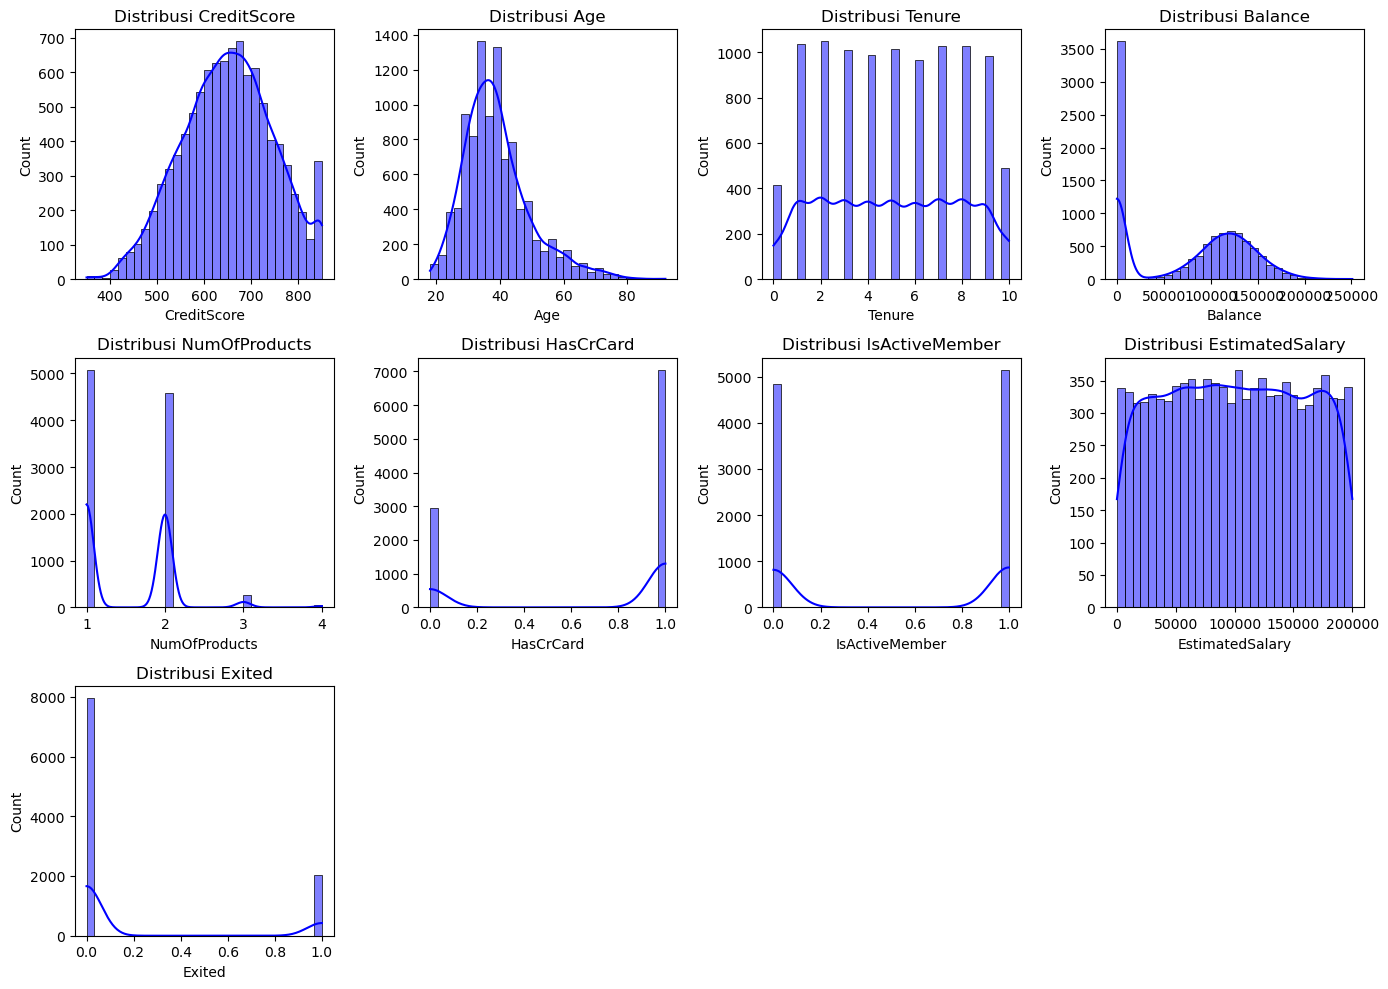

In [26]:
# Distribusi fitur numerik
num_features = data.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[column], bins=30, kde=True, color="blue")
    plt.title(f"Distribusi {column}")
plt.tight_layout()
plt.show()

### Interpretasi Histogram Dataset

#### 1. CreditScore
Distribusi **CreditScore** menunjukkan pola mendekati normal, dengan sebagian besar pelanggan memiliki skor kredit di kisaran tengah (sekitar 600–700). Hanya sedikit pelanggan dengan skor sangat rendah (<400) atau sangat tinggi (>800). Hal ini menunjukkan bahwa kebanyakan pelanggan memiliki kelayakan kredit yang cukup baik.

#### 2. Age
Distribusi **Age** bersifat miring ke kanan (*positively skewed*), dengan sebagian besar pelanggan berada di kelompok usia muda hingga pertengahan dewasa (20–40 tahun). Pelanggan berusia lanjut (>60 tahun) lebih sedikit jumlahnya.

#### 3. Tenure
Distribusi **Tenure** memiliki nilai diskrit yang hampir seragam, menunjukkan bahwa pelanggan memiliki berbagai lama berlangganan (0 hingga 10 tahun) tanpa dominasi pada durasi tertentu. Hal ini dapat mengindikasikan pelanggan dengan perilaku berlangganan yang beragam.

#### 4. Balance
Distribusi **Balance** menunjukkan pola yang sangat miring ke kanan, di mana sebagian besar pelanggan memiliki saldo mendekati nol, tetapi terdapat sejumlah kecil pelanggan dengan saldo yang sangat tinggi. Ini menggambarkan adanya ketimpangan saldo antar pelanggan.

#### 5. NumOfProducts
Mayoritas pelanggan memiliki **1 atau 2 produk**, sementara sangat sedikit yang memiliki **3 atau 4 produk**. Hal ini mengindikasikan keterlibatan pelanggan yang lebih rendah terhadap variasi produk yang ditawarkan.

#### 6. HasCrCard
Sebagian besar pelanggan memiliki kartu kredit (**nilai 1**), sedangkan sebagian kecil tidak memiliki kartu kredit (**nilai 0**). Ini menunjukkan dominasi pengguna dengan kartu kredit dalam dataset ini.

#### 7. IsActiveMember
Banyak pelanggan yang berstatus anggota aktif (**nilai 1**), meskipun terdapat jumlah yang cukup signifikan dari pelanggan tidak aktif (**nilai 0**). Hal ini bisa menunjukkan adanya tingkat keterlibatan yang beragam di antara pelanggan.

#### 8. EstimatedSalary
Distribusi **EstimatedSalary** cukup merata di seluruh rentang (0–200.000), menunjukkan bahwa dataset mencakup pelanggan dari berbagai latar belakang pendapatan tanpa adanya dominasi di kelompok tertentu.

#### 9. Exited (Label Target)
Distribusi **Exited** menunjukkan ketidakseimbangan kelas, di mana sebagian besar pelanggan tidak keluar dari layanan (**nilai 0**), dan hanya sebagian kecil pelanggan yang keluar (**nilai 1**). Hal ini menggambarkan bahwa tingkat churn dalam dataset relatif rendah.


In [27]:
# standardisasi fitur 
from sklearn.preprocessing import StandardScaler

# Standardisasi CreditScore
scaler = StandardScaler()
data["CreditScore"] = scaler.fit_transform(data[["CreditScore"]])

# Standardisasi Age
scaler = StandardScaler()
data["Age"] = scaler.fit_transform(data[["Age"]])

# Standardisasi Balance
scaler = StandardScaler()
data["Balance"] = scaler.fit_transform(data[["Balance"]])

# Standardisasi EstimatedSalary
scaler = StandardScaler()
data["EstimatedSalary"] = scaler.fit_transform(data[["EstimatedSalary"]])

Kode tersebut melakukan standardisasi (Z-score normalization) pada kolom "CreditScore", "Age", "Balance", dan "EstimatedSalary" di DataFrame data. Standardisasi mengubah data sehingga rata-rata mendekati 0 dan deviasi standar mendekati 1. Ini penting untuk algoritma yang sensitif terhadap skala fitur. Kode yang diperbaiki lebih efisien dengan menggunakan satu objek StandardScaler untuk semua fitur.

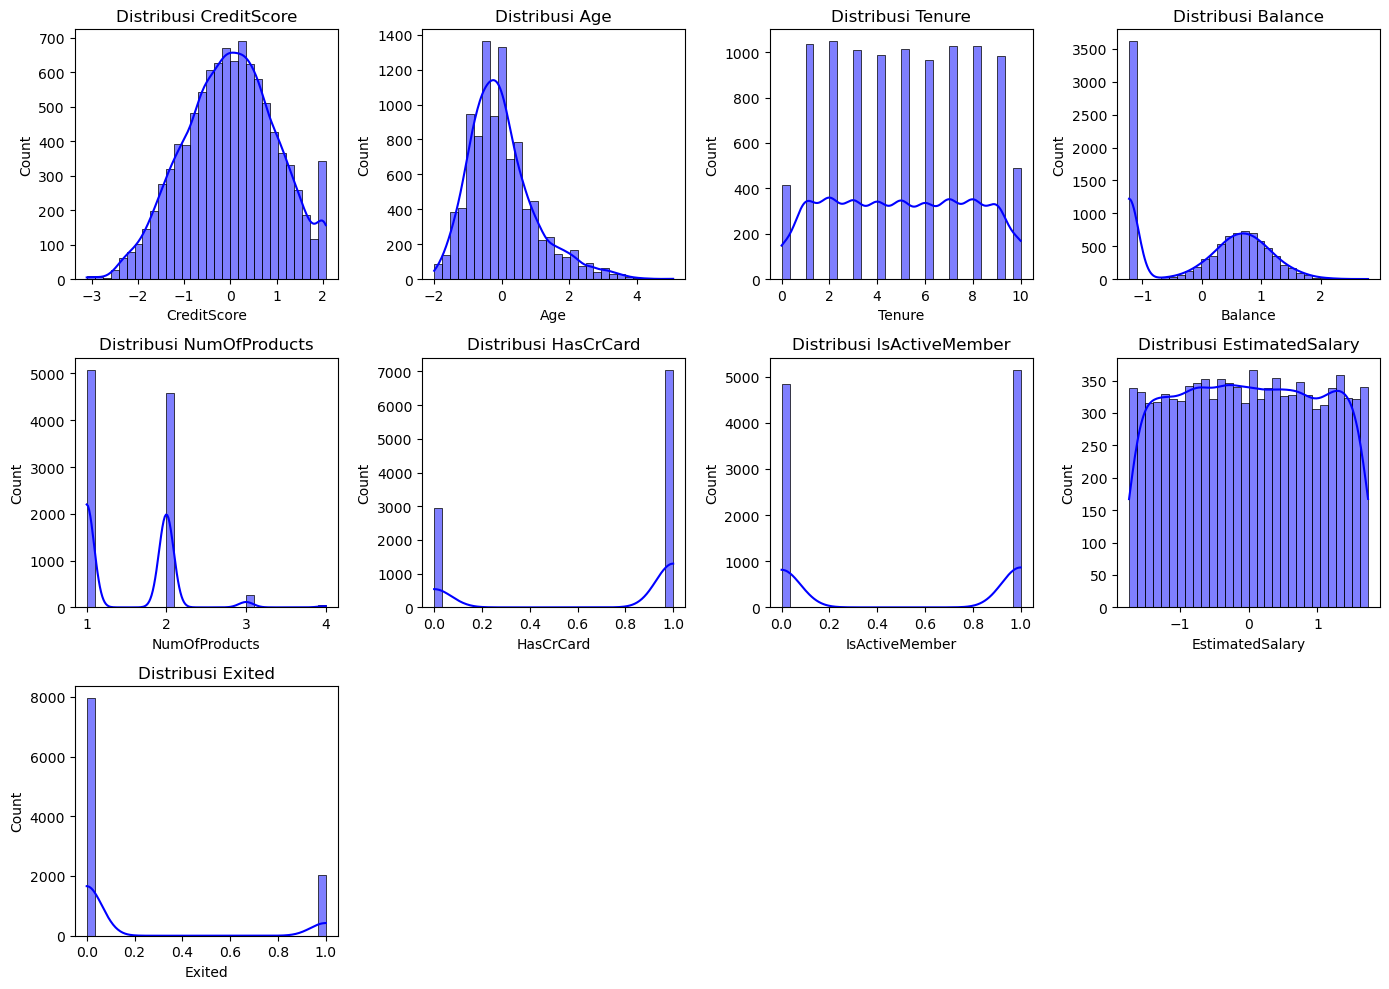

In [28]:
# Distribusi fitur numerik setelah standardisasi
num_features = data.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[column], bins=30, kde=True, color="blue")
    plt.title(f"Distribusi {column}")
plt.tight_layout()
plt.show()

CreditScore:

Distribusi terlihat sedikit miring ke kiri (negatively skewed), meskipun setelah standardisasi.
Sebagian besar data terkonsentrasi antara -2 dan 2, yang berarti sebagian besar CreditScore berada dalam 2 deviasi standar dari rata-rata.
Ekor distribusi di sisi kiri menunjukkan adanya beberapa nilai CreditScore yang jauh di bawah rata-rata.
Age:

Distribusi jelas miring ke kanan (positively skewed), bahkan setelah standardisasi. Ini berarti ada lebih banyak orang dengan usia di bawah rata-rata daripada di atas rata-rata.
Sebagian besar data berada di antara -2 dan 2, tetapi ekor distribusi yang panjang di sisi kanan menunjukkan adanya beberapa orang dengan usia yang jauh di atas rata-rata.
Balance:

Distribusi sangat miring ke kanan. Standardisasi telah mengubah skala, tetapi kemiringan ekstremnya masih terlihat jelas.
Sebagian besar data terkumpul di sekitar 0 atau di bawahnya, menunjukkan bahwa banyak nasabah memiliki saldo di bawah rata-rata.
Kemiringan yang parah ini menunjukkan bahwa transformasi lain seperti log transformation mungkin diperlukan untuk pemodelan yang lebih baik.
EstimatedSalary:

Distribusi terlihat cukup seragam (mendekati distribusi uniform) dan berpusat di sekitar 0.
Sebagian besar data berada di antara -1 dan 1, menunjukkan bahwa sebagian besar perkiraan gaji berada dalam satu deviasi standar dari rata-rata.

/tmp/ipykernel_47984/2248074101.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], palette="viridis")
/tmp/ipykernel_47984/2248074101.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], palette="viridis")


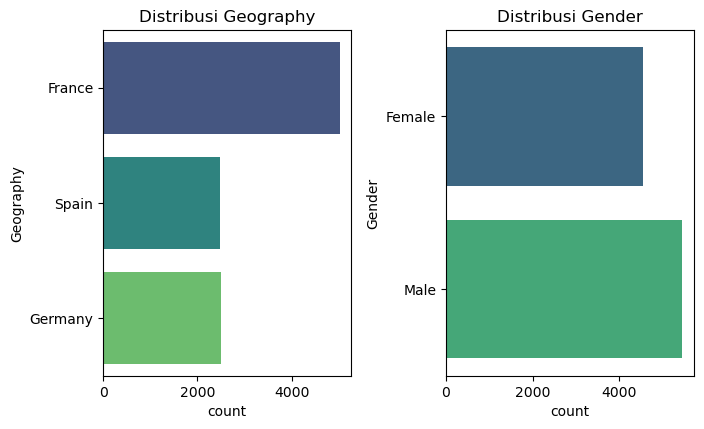

In [29]:
# Distribusi fitur kategorikal
cat_features = data.select_dtypes(include=[object])
plt.figure(figsize=(14, 8))
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(y=data[column], palette="viridis")
    plt.title(f"Distribusi {column}")
plt.tight_layout()
plt.show()

Distribusi Geography (Geografi):

Sebagian besar nasabah berasal dari Prancis (France), diikuti oleh Spanyol (Spain), dan kemudian Jerman (Germany).
Jumlah nasabah dari Prancis jauh lebih banyak dibandingkan dengan dua negara lainnya.
Distribusi Gender (Jenis Kelamin):

Jumlah nasabah laki-laki (Male) sedikit lebih banyak dibandingkan dengan nasabah perempuan (Female).
Perbedaan jumlah antara laki-laki dan perempuan tidak terlalu signifikan.
Kesimpulan:

Data menunjukkan dominasi nasabah dari Prancis dan sedikit lebih banyak nasabah laki-laki daripada perempuan.

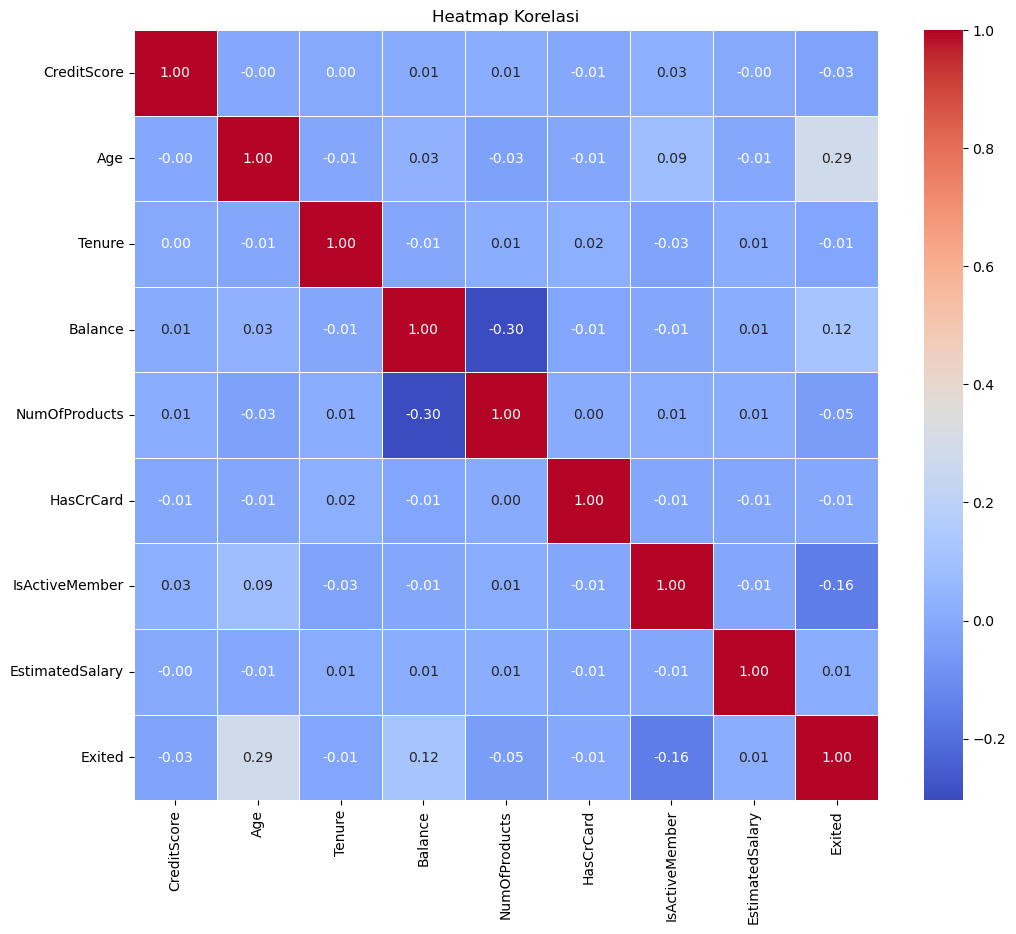

In [30]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidth=0.5)
plt.title("Heatmap Korelasi")
plt.show()

Heatmap korelasi memvisualisasikan matriks korelasi, yang menunjukkan hubungan linier antara pasangan variabel numerik. Warna dan angka dalam heatmap menunjukkan kekuatan dan arah korelasi:

Warna Merah: Korelasi positif. Semakin merah, semakin kuat korelasinya (mendekati 1).
Warna Biru: Korelasi negatif. Semakin biru, semakin kuat korelasinya (mendekati -1).
Warna Putih/Netral: Korelasi mendekati 0, menunjukkan hubungan linier yang lemah atau tidak ada.
Angka dalam Kotak: Nilai korelasi itu sendiri.
Interpretasi dari Heatmap Anda:

Diagonal Utama (Nilai 1.00): Diagonal utama selalu bernilai 1.00 karena menunjukkan korelasi suatu variabel dengan dirinya sendiri.

Korelasi Antar Fitur: Sebagian besar fitur menunjukkan korelasi yang sangat lemah (mendekati 0) satu sama lain. Ini ditunjukkan oleh warna putih/netral pada sebagian besar kotak. Berikut beberapa korelasi yang sedikit lebih menonjol:

Age dan Exited (0.29): Terdapat korelasi positif yang cukup lemah antara usia dan kemungkinan nasabah keluar (Exited). Ini berarti ada kecenderungan kecil bahwa nasabah yang lebih tua sedikit lebih mungkin untuk keluar.
Balance dan NumOfProducts (-0.30): Terdapat korelasi negatif yang cukup lemah antara saldo (Balance) dan jumlah produk yang dimiliki nasabah (NumOfProducts). Ini menunjukkan bahwa nasabah dengan saldo yang lebih tinggi cenderung memiliki lebih sedikit produk.
IsActiveMember dan Exited (-0.16): Terdapat korelasi negatif yang lemah antara status keaktifan nasabah (IsActiveMember) dan kemungkinan keluar (Exited). Ini menunjukkan bahwa nasabah yang aktif cenderung lebih kecil kemungkinannya untuk keluar.
Korelasi Lainnya: Korelasi lainnya sangat mendekati nol, yang menunjukkan tidak ada hubungan linier yang signifikan antara fitur-fitur tersebut.

Kesimpulan:

Secara keseluruhan, heatmap ini menunjukkan bahwa tidak ada korelasi linier yang kuat antar fitur numerik dalam dataset Anda, kecuali beberapa korelasi lemah yang disebutkan di atas. Ini penting untuk diingat saat membangun model machine learning, karena:

Jika ada korelasi yang sangat tinggi (misalnya, di atas 0.8 atau di bawah -0.8), salah satu fitur yang berkorelasi tinggi mungkin perlu dihilangkan untuk menghindari multikolinearitas, yang dapat memengaruhi kinerja beberapa model. Dalam kasus ini, Anda tidak perlu khawatir tentang multikolinearitas.
Model-model tertentu, seperti regresi linier, sangat sensitif terhadap multikolinearitas. Model lain, seperti tree-based models (misalnya, Random Forest, Gradient Boosting), umumnya lebih tahan terhadapnya.


/tmp/ipykernel_47984/1529812085.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Exited", data=data, palette="viridis")


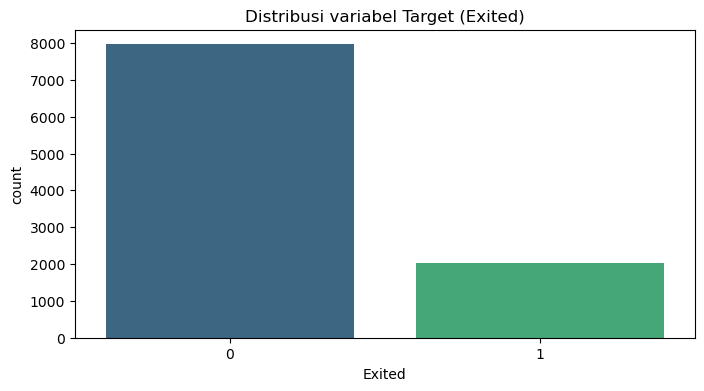

In [31]:
# Visualisasi distribusi variabel target
plt.figure(figsize=(8, 4))
sns.countplot(x="Exited", data=data, palette="viridis")
plt.title("Distribusi variabel Target (Exited)")
plt.show()

Visualisasi menunjukkan distribusi variabel target "Exited" (keluar/tidaknya nasabah). Jumlah nasabah yang tidak keluar (0) jauh lebih banyak daripada yang keluar (1)

# Preprocessing data

In [32]:
# import library
from sklearn.preprocessing import LabelEncoder

# Buat Instance LabelEncoder
label_encoder = LabelEncoder()

# List kolom kategorikal yang perlu di encode
categorical_columns = ["Geography", "Gender"]

# Encode kolom kategorikal
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Tampilkan dataframe untuk memastikan encoding telah diterapkan
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,0,0,0.293517,2,-1.225848,1,1,1,0.021886,1
1,-0.440036,2,0,0.198164,1,0.117350,1,0,1,0.216534,0
2,-1.536794,0,0,0.293517,8,1.333053,3,1,0,0.240687,1
3,0.501521,0,0,0.007457,1,-1.225848,2,0,0,-0.108918,0
4,2.063884,2,0,0.388871,2,0.785728,1,1,1,-0.365276,0


Kode ini melakukan encoding (pengkodean) kolom kategorikal "Geography" dan "Gender" menjadi numerik menggunakan LabelEncoder dari scikit-learn.

LabelEncoder diimpor.
Objek LabelEncoder dibuat.
Kolom "Geography" dan "Gender" ditetapkan sebagai kolom kategorikal yang akan di-encode.
Sebuah loop memproses setiap kolom kategorikal:
fit() melatih encoder pada data kolom, memetakan setiap nilai unik ke angka.
transform() mengubah nilai asli kolom menjadi representasi numeriknya.
data.head() menampilkan beberapa baris pertama dataframe setelah encoding, memverifikasi penerapan encoding.
Singkatnya, kode ini mengubah data teks pada kolom "Geography" dan "Gender" menjadi angka, misalnya "France" menjadi 0, "Germany" menjadi 1, dan seterusnya. Ini diperlukan karena algoritma machine learning umumnya bekerja dengan data numerik.

In [33]:
# import library
from sklearn.model_selection import train_test_split

# Pisahkan fitur (x) dan target (y)
X = data.drop(columns=["Exited"])
y = data["Exited"]

# Split data menjadi set pelatihan untuk set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(8000, 10), y_train=(8000,)
Test set shape: X_test=(2000, 10), y_test=(2000,)


Kode ini membagi dataset menjadi 80% data latih dan 20% data uji. Pembagian ini penting dalam machine learning untuk melatih model pada data latih dan menguji performanya pada data uji yang belum pernah dilihat sebelumnya, sehingga dapat dievaluasi seberapa baik model tersebut dapat melakukan generalisasi pada data baru.

# Modelling

In [34]:
# pelatihan model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Definisikan setiap klasifikasi secara terpisah
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print(f"Model training selesai")

Model training selesai


Kode ini melatih lima model klasifikasi yang berbeda (KNN, Decision Tree, Random Forest, SVM, dan Naive Bayes) menggunakan data latih yang telah dipisahkan sebelumnya. Setelah pelatihan selesai, model-model ini siap digunakan untuk memprediksi data baru (data uji). Langkah selanjutnya biasanya adalah mengevaluasi performa setiap model menggunakan metrik seperti akurasi, presisi, recall, dan F1-score pada data uji untuk memilih model terbaik.

In [35]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kasus
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        "Confusion Matrix" : cm,
        "True Postive (TP)" : tp,
        "False Positive (FP)" : fp,
        "False Negative (FN)" : fn,
        "True Negative (TN)" : tn,
        "Accuracy" : accuracy_score(y_test, y_pred),
        "Precision" : precision_score(y_test, y_pred),
        "Recall" : recall_score(y_test, y_pred),
        "F1-Score" : f1_score(y_test, y_pred)
    }
    return results

# Mengevaluasi setiap model
results = {
    "K-Nearest Neighbors (KNN)" : evaluate_model(knn, X_test, y_test),
    "Decision Tree (DT)" : evaluate_model(dt, X_test, y_test),
    "Random Forest (RF)" : evaluate_model(rf, X_test, y_test),
    "Support Vector Machine (SVM)" : evaluate_model(svm, X_test, y_test),
    "Naive Bayes (NB)" : evaluate_model(nb, X_test, y_test)
}

# Buat Dataframe untuk meringkas hasil
summary_df = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1_Score"])

# Isi dataframe dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        "Model": model_name,
        "Accuracy": metrics["Accuracy"],
        "Precision": metrics["Precision"],
        "Recall": metrics["Recall"],
        "F1-Score": metrics["F1-Score"]
    })

# Konversi daftar kamus ke dataframe
summary_df = pd.DataFrame(rows)

# Tampilkan dataframe
summary_df

,Model,Accuracy,Precision,Recall,F1-Score
0,K-Nearest Neighbors (KNN),0.8300,0.619910,0.348601,0.446254
1,Decision Tree (DT),0.7855,0.460000,0.526718,0.491103
2,Random Forest (RF),0.8655,0.762712,0.458015,0.572337
3,Support Vector Machine (SVM),0.8260,0.924528,0.124682,0.219731
4,Naive Bayes (NB),0.8285,0.681159,0.239186,0.354049


Random Forest (RF) memiliki akurasi tertinggi (0.8640) dan F1-Score yang cukup baik (0.569620), menunjukkan kinerja yang paling baik secara keseluruhan di antara model-model ini. RF memiliki presisi yang cukup baik, menandakan bahwa ketika RF memprediksi suatu data termasuk dalam kelas positif, kemungkinan prediksinya benar cukup tinggi, meskipun recallnya tidak terlalu tinggi.

SVM memiliki presisi yang sangat tinggi (0.924528), tetapi recallnya sangat rendah (0.124682). Ini berarti SVM sangat konservatif dalam memprediksi kelas positif; ketika memprediksi positif, hampir selalu benar, tetapi ia melewatkan banyak kasus positif yang sebenarnya (banyak false negative). F1-scorenya juga sangat rendah, menunjukkan bahwa model ini kurang baik secara keseluruhan, terutama jika penting untuk menangkap sebanyak mungkin kasus positif.

Decision Tree (DT) memiliki recall yang relatif lebih tinggi (0.521628) dibandingkan model lainnya, tetapi presisinya rendah (0.452539). Ini berarti DT lebih cenderung memprediksi suatu data sebagai positif, tetapi sering salah (banyak false positive).

KNN dan Naive Bayes memiliki kinerja di antara RF dan DT, dengan akurasi dan F1-Score yang sedang.

Kesimpulan:

Berdasarkan metrik yang diberikan, Random Forest (RF) tampaknya menjadi model terbaik dalam kasus ini, karena memiliki akurasi dan F1-score tertinggi

In [39]:
# Cross Validation
from sklearn.model_selection import cross_val_score

# Menginisialisasi model-model
models = {
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Decision Tree (DT)": DecisionTreeClassifier(),
    "Random Forest (RF)": RandomForestClassifier(),
    "Support Vector Machine (SVM)": SVC(),
    "Naive Bayes (NB)": GaussianNB()
}

# Melakukan 5-fold cross validation pada setiap model dan menampilkan hasilnya
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5) # 5-fold cross validation
    print(f"Akurasi {model_name} dengan 5-fold cross-validation: {scores.mean():.2f} dengan standar devisiasi {scores.std():.2f}")

Akurasi K-Nearest Neighbors (KNN) dengan 5-fold cross-validation: 0.82 dengan standar devisiasi 0.00
Akurasi Decision Tree (DT) dengan 5-fold cross-validation: 0.79 dengan standar devisiasi 0.00
Akurasi Random Forest (RF) dengan 5-fold cross-validation: 0.86 dengan standar devisiasi 0.00
Akurasi Support Vector Machine (SVM) dengan 5-fold cross-validation: 0.81 dengan standar devisiasi 0.00
Akurasi Naive Bayes (NB) dengan 5-fold cross-validation: 0.83 dengan standar devisiasi 0.01
